# Matplotlib. Homework №1. Evgrafov Michail 915.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Предисловие к первым двум заданиям. 

Мне не хотелось прописывать каждую диаграмму вручную, как я это представлял себе изначально. Идея с функцией потерпела неудачу на этапе планирования, поскольку мне не хотелось давать пользователю большого контроля над областями рисунка. Тогда поле должно было бы создаваться в функции, что мне не нравилось, поскольку функция была бы некрасивой, и обладала бы большим количеством аргументов с распаковщиками и прочим. Поэтому решено было воспользоваться ООП. 

Поскольку, я поставил перед собой цель изолировать пользователя от figure, а задача №1 и №2 представляют из себя +/- одно и то же, я решил написать абстрактный класс, для того, чтобы обеспечить общий интерфейс классов *MuptiBars* и *MultiPies*. Знаю, что в Python это занятие, в принципе, бесполезное, однако, мне кажется, так будет правильнее. 

**Абстрактный класс IMultiDiagramm**:

In [3]:
from abc import ABC, abstractmethod

In [4]:
class IMultiDiagramm(ABC):
    """
    Abstract class
    
    It is just interface
    
    """ 
    @abstractmethod
    def add_diagramm(self):
        """
        Add new diagram
        
        """
        None
        
    @abstractmethod    
    def show(self):
        """
        Show all diagramms
        
        """
        plt.show()

### Задание №1

**Цель**: Построение столбчатых bar-диаграмм с помощью средств matplotlib.pyplot. 

**Challenge**: не дать пользователю прямого доступа к *figure* и *axes*.

**Используемые средства:**

>1. matplotlib.pyplot
>2. numpy
>3. Встроенные функции python.

#### Реализация: 

In [5]:
class MultiBars(IMultiDiagramm):
    """
    There is a class for building several
    number of bar diagramms
    
    """
    def __init__(self, mcols, nraws):
        self.__fig = plt.figure(figsize=(mcols * 6.4, nraws * 4.8))
        self.__memory = [None for i in range(nraws * mcols)]
        self.__weight = round(8 / (mcols * 10), 2)
        self.__hight = round(8 / (nraws * 10), 2)
        self.__raws = nraws
        self.__cols = mcols
        self.__i = 0
            
    def add_diagramm(self, title, labels, local, glob, l_label, g_label):
        """
        Add new diagram in memory and in fig
        
        """
        try:
            if self.__i >= len(self.__memory):
                raise Exception('Error: there are no free locs')
                
            left = (1 / self.__cols) * (self.__i % self.__cols)
            bottom = (1 / self.__raws) * (self.__i // self.__cols)
            
            ax = self.__fig.add_axes([left, bottom, self.__weight, self.__hight])
            
            x, width = np.arange(len(labels)), 0.4
            
            g_diagram = ax.bar(x, glob, width, color='m', edgecolor='k',
                                     label=g_label)
            l_diagram = ax.bar(x, local, width, color='c', edgecolor='k',
                                     label=l_label)
            
            ax.set_title(title, fontsize=15, fontweight='bold')
            ax.set_xticks(x)
            ax.set_xticklabels(labels, fontsize=11, fontweight='bold')
            ax.set_ylabel('Amount', fontsize=11, fontweight='bold')
            
            ax.legend()
            ax.grid()
            
            self.__memory[self.__i] = ax
            
            self.__i += 1
            
        except Exception as err:
            print(err.args[0])
            
    def show(self):
        """
        Show all diagramms
        
        """
        super().show()

#### Непосредственное выполнение задания:

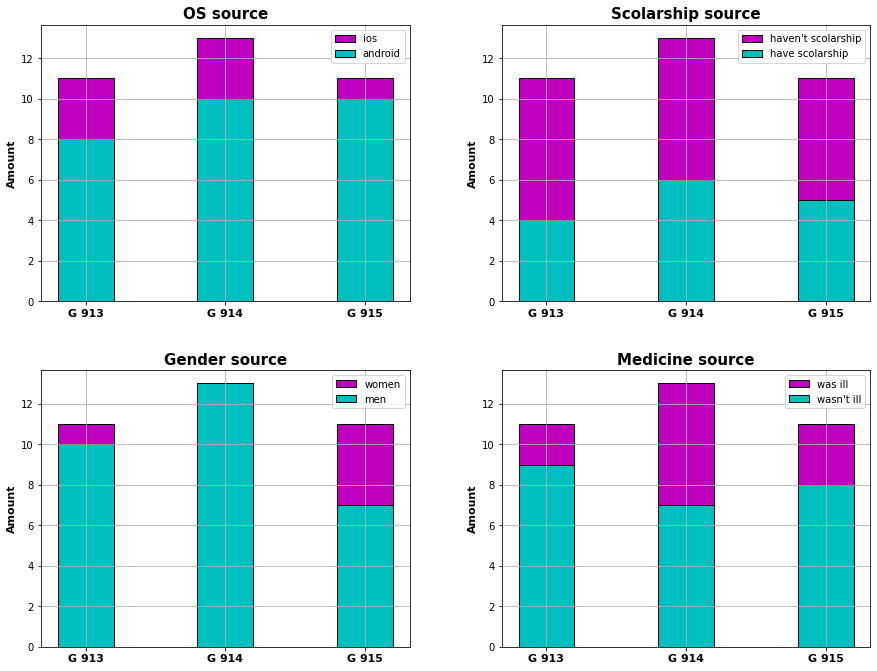

In [11]:
labels = ['G 913', 'G 914', 'G 915']

amount_of_people = [11, 13, 11] 
group_amounts = [[10, 13, 7],
                 [9, 7, 8],   
                 [8, 10, 10], 
                 [4, 6, 5]]   

titles = ['Gender source', 'Medicine source', 'OS source', 'Scolarship source']
l_labels = ['men', "wasn't ill", 'android', 'have scolarship']
g_labels = ['women', 'was ill', 'ios', "haven't scolarship"]
                 
my_bars = MultiBars(2, 2)

for i in range(len(titles)):
    my_bars.add_diagramm(titles[i], labels, group_amounts[i], amount_of_people,
                   l_labels[i], g_labels[i])
        
my_bars.show()

### Задание №2

**Цель**: Построение круговых pie-диаграмм с помощью средств matplotlib.pyplot. 

**Challenge**: не дать пользователю прямого доступа к *figure* и *axes*.

**Используемые средства:**

>1. matplotlib.pyplot
>2. numpy
>3. Встроенные функции python.

#### Реализация.

In [19]:
class MultiPies(IMultiDiagramm):
    """
    There is a class for building several
    number of pie diagramms
    
    """
    def __init__(self, mcols, nraws):
        self.__fig = plt.figure(figsize=(mcols * 6.4, nraws * 4.8))
        self.__memory = [None for i in range(nraws * mcols)]
        self.__weight = round(8 / (mcols * 10), 2)
        self.__hight = round(8 / (nraws * 10), 2)
        self.__raws = nraws
        self.__cols = mcols
        self.__i = 0
            
    def add_diagramm(self, title, parts, labels):
        """
        Add new diagram in memory and in fig
        
        """
        try:
            if self.__i >= len(self.__memory):
                raise Exception('Error: there are no free locs')
                   
            left = (1 / self.__cols) * (self.__i % self.__cols)
            bottom = (1 / self.__raws) * (self.__i // self.__cols)
                
            parts = np.array(parts)
            explode = np.array([(part / np.sum(parts) / 5) for part in parts])
        
            ax = self.__fig.add_axes([left, bottom, self.__weight, self.__hight])
    
            ax.pie(parts, explode=explode, labels=labels, autopct='%1.1f%%',
                  shadow=True)
        
            ax.set_title(title, fontsize=20, fontweight='bold')
    
            self.__memory[self.__i] = ax
        
            self.__i += 1
            
        except Exception as err:
            print(err.args[0])
            
    def show(self):
        """
        Show all diagramms
        
        """
        super().show()

#### Непосредственное выполнение задания:

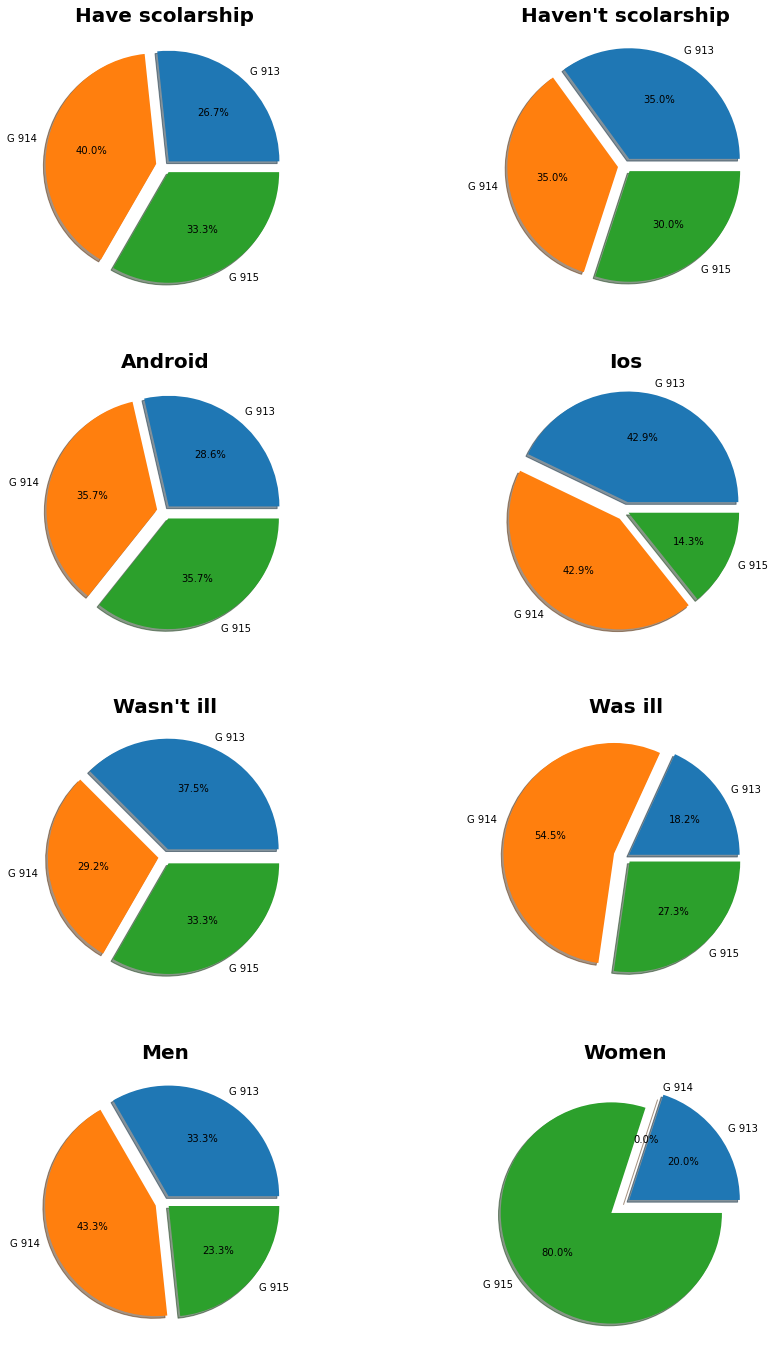

In [21]:
labels = ['G 913', 'G 914', 'G 915']

amount_of_people = np.array([11, 13, 11])
group_amounts = [np.array([10, 13, 7]),
                 np.array([9, 7, 8]),   
                 np.array([8, 10, 10]), 
                 np.array([4, 6, 5])]   

titles = ['Men', 'Women', "Wasn't ill", 'Was ill', 
          'Android', 'Ios', 'Have scolarship', "Haven't scolarship"]
                 
my_pies = MultiPies(2, 4)

for i in range(len(group_amounts)):
    my_pies.add_diagramm(titles[2 * i], group_amounts[i], labels)
    my_pies.add_diagramm(titles[2 * i + 1], 
                         amount_of_people - group_amounts[i],
                         labels)
    
my_pies.show()